2017-11-27 23:07:29: Loss after num_examples_seen=2000 epoch=0: 0.637180
2017-11-27 23:07:31: Loss after num_examples_seen=4000 epoch=1: 0.478966
2017-11-27 23:07:32: Loss after num_examples_seen=6000 epoch=2: 0.461109
2017-11-27 23:07:33: Loss after num_examples_seen=8000 epoch=3: 0.376358
2017-11-27 23:07:34: Loss after num_examples_seen=10000 epoch=4: 0.333396
2017-11-27 23:07:36: Loss after num_examples_seen=12000 epoch=5: 0.363458
2017-11-27 23:07:37: Loss after num_examples_seen=14000 epoch=6: 0.529089
2017-11-27 23:07:38: Loss after num_examples_seen=16000 epoch=7: 0.566999
2017-11-27 23:07:39: Loss after num_examples_seen=18000 epoch=8: 0.538437
2017-11-27 23:07:41: Loss after num_examples_seen=20000 epoch=9: 0.538166
2017-11-27 23:07:42: Loss after num_examples_seen=22000 epoch=10: 0.539357
2017-11-27 23:07:43: Loss after num_examples_seen=24000 epoch=11: 0.539117
2017-11-27 23:07:44: Loss after num_examples_seen=26000 epoch=12: 0.538956
2017-11-27 23:07:45: Loss after num_exa

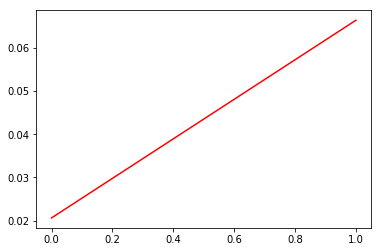

[[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
  0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0
  1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0
  0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
  0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1
  1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
  0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1
  0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0
  1 1 0 1 1]]


In [27]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import numpy as np
import sys
from datetime import datetime
import matplotlib.pyplot as plt #matplotlib inline
import pickle
import random

def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

class RNN:
    def __init__(self, word_dim, hidden_dim=2, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1. / word_dim), np.sqrt(1. / word_dim), (hidden_dim, word_dim))
        #To implement
        self.V = np.random.uniform(-np.sqrt(1. / hidden_dim), np.sqrt(1. / hidden_dim), (word_dim, hidden_dim)) # check
        self.W = np.random.uniform(-np.sqrt(1. / hidden_dim), np.sqrt(1. / hidden_dim), (hidden_dim, hidden_dim))
        self.dU = []
        self.dV = []
        self.dW = []


def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)
    # During forward propagation we save all hidden states in s because need them later.
    # We add one additional element for the initial hidden, which we set to 0
    s = np.zeros((T + 1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
    # For each time step...
    for t in np.arange(T):
        # To implement : Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
        s[t]= np.tanh( self.U.dot(x[t]) + self.W.dot(s[t-1])) 
        o[t] = softmax( self.V.dot(s[t]) )
    
    return [o, s]
RNN.forward_propagation = forward_propagation

def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)
RNN.predict = predict

def calculate_total_loss(self, x, y):
    L = 0
    # For each sequence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # Add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L


def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x, y) / N
RNN.calculate_total_loss = calculate_total_loss
RNN.calculate_loss = calculate_loss

def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        # To Implement
        dLdV += np.outer(delta_o[t], s[t])
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2)) #derivate wrt Ws + Ux
        # To implement: Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t - self.bptt_truncate), t + 1)[::-1]:
            dLdW += np.outer(delta_t, s[bptt_step - 1])
            dLdU += np.outer(delta_t, x[bptt_step])
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step - 1] ** 2)
    return [dLdU, dLdV, dLdW]
RNN.bptt = bptt

# Performs one step of SGD.
def numpy_sgd_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    #To implement: Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
    self.dU.append(dLdU)
    self.dV.append(dLdV)
    self.dW.append(dLdW)
RNN.sgd_step = numpy_sgd_step


# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(model, X_train, y_train, learning_rate=0.5, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        total_loss = 0
        for x , y in zip(X_train, y_train):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model.calculate_loss(x, y)
                losses.append((num_examples_seen, loss))
                total_loss += loss
                
#                 # Adjust the learning rate if loss increases
#                 if (len(losses) > 1 and losses[-1][1] >losses[-2][1]):
#                     learning_rate = learning_rate * 0.5
#                     print("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            # For each training example...
            for i in range(len(y)):
                # One SGD step
                model.sgd_step(x[i], y[i], learning_rate)
                num_examples_seen += 1
        time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        print("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, total_loss / len(X_train)))

def generate_y(data_in, len_seq = 5):
    data_out = []
    for d in data_in:
        a = 0
        for i in d:
            a = (a + i[1]) % 2
            data_out.append(a)
    return np.array(data_out).reshape(-1, len_seq)

def generate_x(string, len_seq = 5):
    data_in = [[int(i == '0'), int(i == '1')] for i in string]
    return np.array(data_in).reshape(-1, len_seq, 2)


model = RNN(2)

len_seq = 5
len_train = 10000
batch_size = 10

data_in = [str(random.randint(0, 1)) for i in range(len_train)]
x = generate_x(data_in)
y = generate_y(x)

x = x.reshape(-1, batch_size, len_seq, 2)
y = y.reshape(-1, batch_size, len_seq)
losses = train_with_sgd(model,x, y,learning_rate = 0.01, nepoch=40, evaluate_loss_after=1)
plt.clf()
plt.plot(model.dU[0][0], color='red', label = 'dU through time')
plt.show()

f = open("Q1.in", 'r')
data_in = f.readlines()[0]
f.close()

x_test = generate_x(data_in, len_seq = len(data_in))

# x_test=np.asarray([[[int(w == 0), int(w == 1)]] for w in X_seq])
print(generate_y(x_test, len_seq = len(data_in)))
for x in x_test:
    predictions = model.predict(x)
    f = open("Q1.out", 'w')
    s = ""
    for p in predictions:
        s += str(p)
    f.write(s)
f.close()
